# Code for finding consumer price index: rent of primary residence using multi-linear regresseion

Importing importand libraries

In [ ]:
import pandas as pd
import numpy as np

Loading the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/main.csv')

Data cleaning: dropping null rows or records

In [ ]:
df.dropna(inplace=True)

First 5 records of the dataset

In [ ]:
df.head()

,year,GDP,Home Price Index,fedral funds effective rate,inflation,average household income,population,population growth,Consumer price index: rent of primary residence
40,1987,9137.74475,66.251500,6.660000,3.664563,60760.0,242289000.0,0.893829,123.150000
41,1988,9519.42675,71.134833,7.568333,4.077741,61210.0,244499000.0,0.907999,127.841667
42,1989,9869.00325,75.502917,9.216667,4.827003,62260.0,246819000.0,0.944406,132.808333
43,1990,10055.12850,76.936417,8.099167,5.397956,61500.0,249623000.0,1.129651,138.408333
44,1991,10044.23750,75.922583,5.687500,4.234964,59710.0,252981000.0,1.336261,143.316667


Last 5 records of the dataset

In [ ]:
df.tail()

,year,GDP,Home Price Index,fedral funds effective rate,inflation,average household income,population,population growth,Consumer price index: rent of primary residence
73,2020,20234.0740,222.131417,0.375833,1.233584,76660.0,331511512.0,0.964348,341.467750
74,2021,21407.6925,260.018417,0.080000,4.697859,76330.0,332031554.0,0.156747,349.134667
75,2022,21822.0365,298.422500,1.683333,8.002800,74580.0,333287557.0,0.377565,370.199000
76,2023,22376.9065,305.683500,5.024167,8.127998,75005.0,333482449.0,0.345565,399.642583
77,2024,22749.8460,316.962000,5.330000,8.065399,74792.5,333385003.0,0.361565,414.329750


Importing seaborn and matplotib to make EDA and find the co-relation between the columns

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

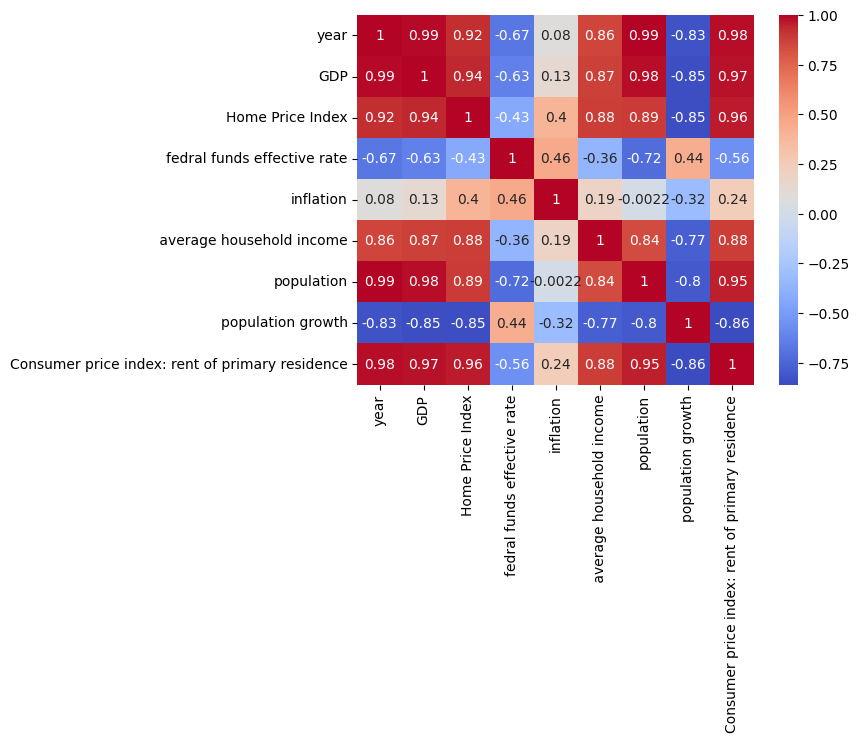

In [ ]:
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

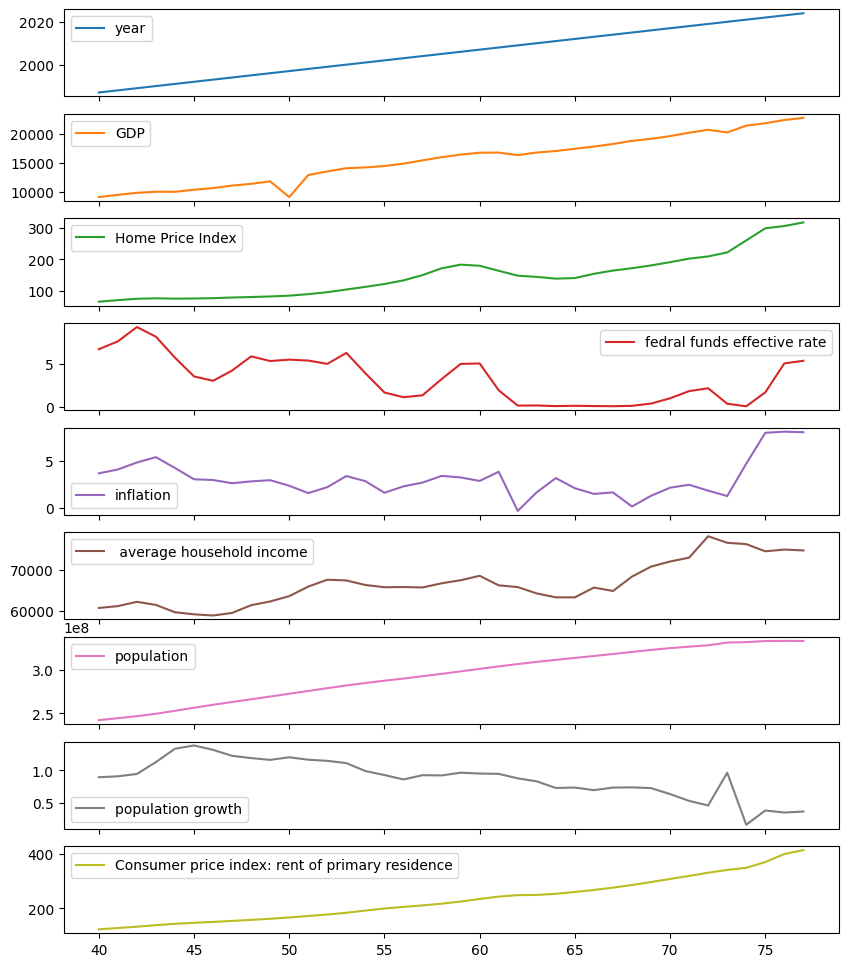

In [ ]:
df.plot(subplots=True, figsize=(10, 12))
plt.show()

Making a multi-linear regression model

In [ ]:
X=df[['GDP','Home Price Index','fedral funds effective rate','inflation','population','population growth']]
y=df['Consumer price index: rent of primary residence']

Splitting the dataset into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26, 6) (12, 6) (26,) (12,)


Fitting the dataset using linear regression using the training data

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Making a prediction using test data

In [ ]:
y_pred = model.predict(X_test)

Finding the mean squared error for the model and the prediction

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 216.96668266717538


In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                             Coefficient
GDP                             0.000155
Home Price Index                0.548933
fedral funds effective rate     0.067203
inflation                       3.027121
population                      0.000001
population growth              -4.622934


Ploting the prediction and the test datapoints and also making the regression line

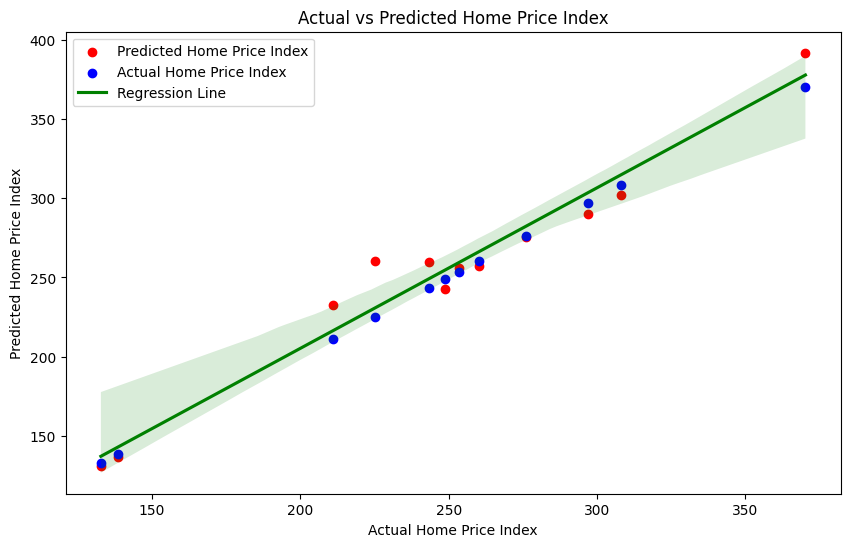

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', label='Predicted Home Price Index')
plt.scatter(y_test, y_test, color='blue', label='Actual Home Price Index')
sb.regplot(x=y_test, y=y_pred, scatter=False, color='green', label='Regression Line')
plt.xlabel('Actual Home Price Index')
plt.ylabel('Predicted Home Price Index')
plt.title('Actual vs Predicted Home Price Index')
plt.legend()
plt.show()

Finding the accuracy of the model

In [ ]:
model.score(X_test,y_test)

0.9469679464669288

Making a prediction using our own input

In [ ]:
predictedPrice = model.predict([[21500,300,4,7,333482554,1.2]])
print(predictedPrice)

[386.24985898]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Resultant in 386.249 home price index